In [3]:
from hwr.data.generator import IAMSequence
from hwr.constants import SPLIT, PATH
from hwr.models.ONNET import ONNET
from matplotlib import pyplot as plt
from hwr.decoding.ctc_decoder import *
from hwr.decoding.mlf import *
import numpy as np

In [4]:
# Load model
model = ONNET(preload=True, gpu=True)

preloading model weights from /home/jasper/Desktop/fyp/HWR/hwr/../models/iamon/ONNET/pretrained-deep-lstm/weights.h5


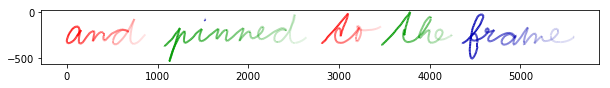

1/1 [==============================] - 1s 916ms/step


'and pinned to the frame '

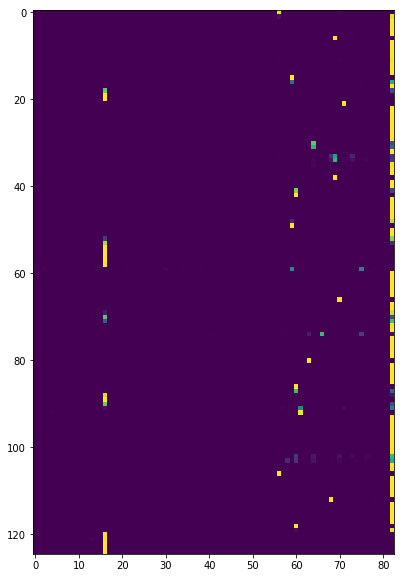

In [7]:
# Sample with pre-decoded output after RNN
pred_seq = IAMSequence(SPLIT.TEST, preprocess=6, npz=True, pred=True, inout_ratio=4)
features, ground_truth, pointset = pred_seq.random_sample()
pointset.plot_strokes()
rnn_out = model.predict_softmax(features)
plt.imshow(rnn_out[0])
ground_truth

In [8]:
best_path_p = BestPathDecoder().decode(rnn_out, 1)[0]
beam_search_p = BeamSearchDecoder(25).decode(rnn_out, 5)
trie_bs_p = TrieBeamSearchDecoder(25, lm='sbo', ngram=7, prune=10, trie='100k', gamma=1).decode(rnn_out, 5)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


In [9]:
print("Best path:")
print(best_path_p[0])
print('\n\n')
print("Vanilla beam search:")
for i in range(0, len(beam_search_p[0])):
    print(beam_search_p[0][i])
print('\n\n')
print("Trie beam search:")
for i in range(0, len(trie_bs_p[0])):
    print(trie_bs_p[0][i])

Best path:
and pinned do khe fame 



Vanilla beam search:
and pinned do khe fame 
and pinned to khe fame 
and pinned do khe feame 
and pinned to khe feame 
and pinned do the fame 



Trie beam search:
and pinned do the fame 
and pinned to the fame 
and pined to the fame 
and pinned do the frame 
and pined do the fame 
